# Angle Attack - Analysis

## Load the packages and functions

In [1]:
## Load packages and settings
import numpy as np
import matplotlib
%matplotlib widget
import pylab as plt
from scipy import stats
from scipy.optimize import minimize
import matplotlib
from copy import deepcopy
from scipy.optimize import curve_fit
import numdifftools as ndt

font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 14}

# Using LaTeX in figures
plt.rc('text', usetex=True)
plt.rc('font',**font)

import matplotlib.transforms as mtransforms

plot = True

## Load the data

In [2]:
data_rgps = np.load('intersection_angle_data_rgps.npz', mmap_mode='r')
data_mosa = np.load('intersection_angle_data_mosaic.npz', mmap_mode='r')

for key in data_rgps:
    print(key)

angle
type
lifetimes
lengths
shears
divergences
dates


## Define variables

In [3]:
ang_rgps = data_rgps['angle']
ang_mosa = data_mosa['angle']

ang_conj_rgps = data_rgps['angle'][np.all([data_rgps['type']==0,np.all(data_rgps['lifetimes']==1,axis=1)],axis=0)]
ang_conj_mosa = data_mosa['angle'][np.all([data_mosa['type']==0,np.all(data_mosa['lifetimes']==1,axis=1)],axis=0)]

ang_nonc_rgps = data_rgps['angle'][np.all([data_rgps['type']==1,np.all(data_rgps['lifetimes']==1,axis=1)],axis=0)]
ang_nonc_mosa = data_mosa['angle'][np.all([data_mosa['type']==1,np.all(data_mosa['lifetimes']==1,axis=1)],axis=0)]

## Determine all potential discrete intersection angles
Since the length values of the LKFs are discrete, their possible orientation is also discrete and thereby also the possible intersection angles. All values are computed based on the median length of intersecting LKFs. The discrete values are used in the statistical test of the disctributions.

21.970600178371107 17.899494936625114


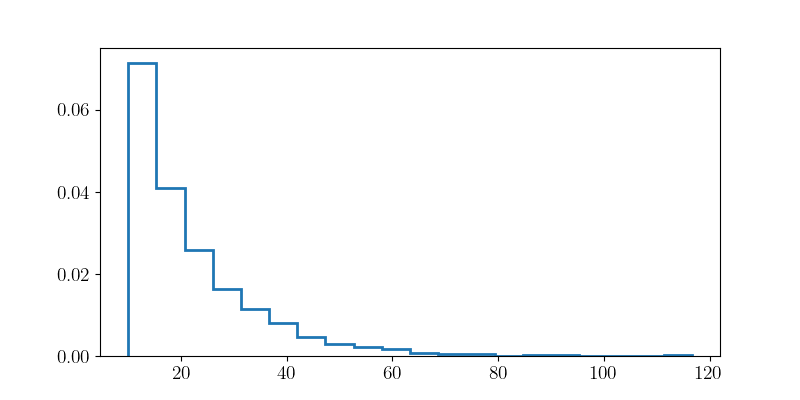

In [4]:
len_rgps = data_rgps['lengths'][np.all([data_rgps['type']==0,np.all(data_rgps['lifetimes']==1,axis=1)],axis=0)]
len_rgps.flatten().shape
fig, ax = plt.subplots(1, 1, figsize=(8,4),dpi=100)

nbin=20
pdf_length, bins, _ = ax.hist(len_rgps.flatten()/12.5e3, bins = nbin, density=True, histtype='step', lw=2)

print(np.mean(len_rgps)/12.5e3,np.median(len_rgps)/12.5e3)

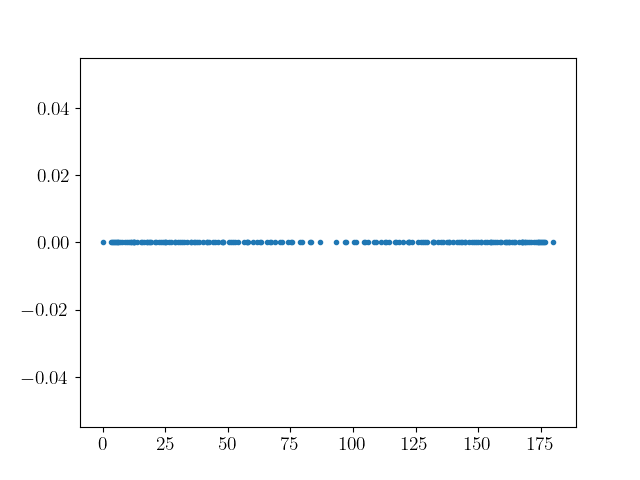

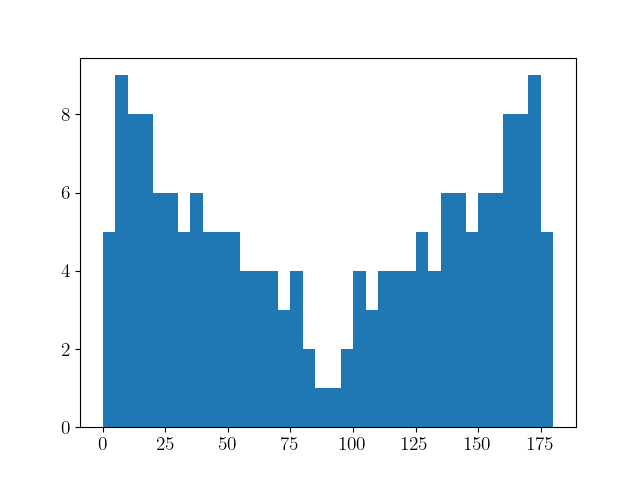

In [5]:
npoints = 9
dis_ang = [np.arctan(ip/npoints)/np.pi*180 for ip in range(-npoints,npoints)]
uni_ang = np.unique(np.abs(np.concatenate([dis_ang-iang for iang in dis_ang])))
uni_ang = np.concatenate([uni_ang,180-uni_ang])
uni_ang.sort()
fig,ax = plt.subplots(1,1)
ax.plot(uni_ang,np.zeros(uni_ang.shape),'.');
fig,ax = plt.subplots(1,1)
ax.hist(uni_ang,bins=36);

## Plots of distribution

### Plot and fit of the distribution (the final one)


ar  2.396006995330368
am  2.5142778245711117
br  34.05426472894546
bm  27.17967917599301
cr  13.582193682513006
cm  12.935291833095029
tr 32.543031075233095
tm 32.52291741030664
stdr 35.26364780893893
stdm 35.000884727174565
mr [49.19991444]
mm [41.69758884]
phim [48.30241116]
phir [40.80008556]
mur [0.86317945]
mum [1.1224705]
muIr [0.75699408]
muIm [0.66519893]
rms_r 0.0005738259656519788
rms_m 0.0008018956066852124
RGPS
MLE with scipy exGaussian likelihood-function:
a = 2.396006 +- 0.082228
b = 34.054260 +- 0.414186
c = 13.582206 +- 0.318646
t = 32.543050 +- 1.880315
 
MOSAiC
MLE with scipy exGaussian likelihood-function:
a = 2.514278 +- 0.319590
b = 27.179684 +- 1.463061
c = 12.935287 +- 1.140151
t = 32.522903 +- 7.000647
pars_r [ 2.39600623 34.05426033 13.58220583]
pars_m [ 2.51427756 27.17968382 12.93528749]
er [0.08222803 0.41418634 0.31864567]
em [0.3195902  1.46306067 1.14015075]
Mode RGPS  : m = 48.99 + 1.09 - 0.72
Mode MOSAiC: m = 41.73 + 3.74 - 3.45


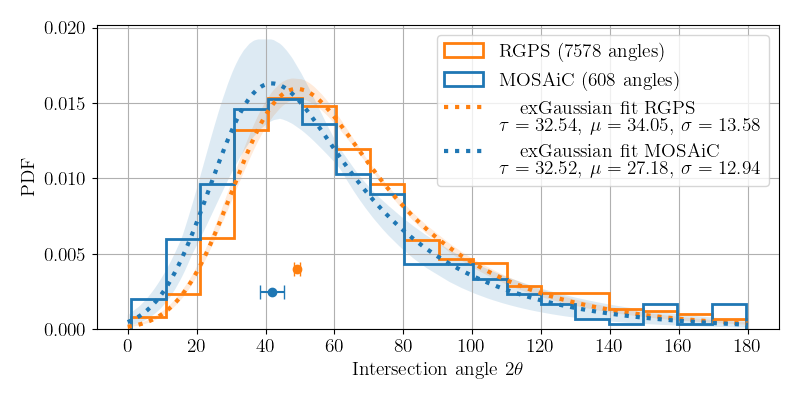

In [6]:

func=stats.exponnorm
# func = stats.lognorm
# func = stats.skewnorm

do_monte_carlo_test = False
do_discrete_angles = True
mc_iters = 10000

print('')
print(func)

fig, ax = plt.subplots(1, 1, figsize=(8,4),dpi=100)

ticks=np.arange(0,200,20)

nbin=18
(pdf_mosa, pdf_rgps), bins, _ = ax.hist([ang_conj_mosa,ang_conj_rgps], bins = nbin, density=True, label=['MOSAiC ('+str(len(ang_conj_mosa))+' angles)','RGPS ('+str(len(ang_conj_rgps))+' angles)'], histtype='step', lw=2)

ax.set_xticks(ticks)

ar, br, cr  = func.fit(ang_conj_rgps)
am, bm, cm  = func.fit(ang_conj_mosa)

# K
print("ar ", ar)
print("am ", am)

# loc
print("br ", br)
print("bm ", bm)

# scale
print("cr ", cr)
print("cm ", cm)

#tau
tr = ar*cr
tm = am*cm
print("tr",tr)
print("tm",tm)

th = np.linspace(0, 180, 1000)
# th = np.linspace(0, 180, 10)
p_rgps = func.pdf(th, ar, br, cr )
p_mosa = func.pdf(th, am, bm, cm )

print('stdr',func.std(ar, br, cr ))
print('stdm',func.std(am, bm, cm ))


def densr(x):
    return -func.pdf(x, ar, br, cr )

def densm(x):
    return -func.pdf(x, am, bm, cm )

mr=minimize(densr,0).x
mm=minimize(densm,0).x

print('mr',mr)
print('mm',mm)

phim = np.pi/2.-mm*np.pi/180
phir = np.pi/2.-mr*np.pi/180

print('phim',phim*180/np.pi)
print('phir',phir*180/np.pi)

mur = np.tan(phir)
mum = np.tan(phim)

print('mur',mur)
print('mum',mum)

muIr = np.cos(phir)
muIm = np.cos(phim)

print('muIr',muIr)
print('muIm',muIm)

th2 = np.linspace(5, 175, nbin)
p_rgps2 = func.pdf(th2, ar, br, cr )
p_mosa2 = func.pdf(th2, am, bm, cm )

dpr=(pdf_rgps-p_rgps2)
dpm=(pdf_mosa-p_mosa2)

print('rms_r',np.sqrt(np.mean(dpr**2)))
print('rms_m',np.sqrt(np.mean(dpm**2)))

addr = r'exGaussian fit RGPS \\ $\tau={:.2f}$, $\mu={:.2f}$, $\sigma={:.2f}$'.format(tr,br,cr)
addm = r'exGaussian fit MOSAiC \\ $\tau={:.2f}$, $\mu={:.2f}$, $\sigma={:.2f}$'.format(tm,bm,cm)

# Testing the parameters
def MLE_fit_error(xdata,params0):

    # negatuve Log likelihood of exGaussian distribution
    def nll_exG(params):
        return -np.sum(np.log(func.pdf(xdata, params[0], params[1], params[2])))

    results = minimize(nll_exG, params0)
#     print(results)
    
    Hfun = ndt.Hessian(nll_exG, full_output=True)
    hessian_ndt, info = Hfun(results.x)
#     print('info: ',info)
    se = np.sqrt(np.diag(np.linalg.inv(hessian_ndt)))
    print('MLE with scipy exGaussian likelihood-function:')
    print('a = {:f} +- {:f}'.format(results.x[0], se[0]))
    print('b = {:f} +- {:f}'.format(results.x[1], se[1]))
    print('c = {:f} +- {:f}'.format(results.x[2], se[2]))
    t = results.x[0]*results.x[2]
    set = se[2]*results.x[0]+se[0]*results.x[2]
    print('t = {:f} +- {:f}'.format(t, set))
    
#     print('Difference with previous fit values')
#     print('a_diff = {:f}'.format(results.x[0]-params0[0]))
#     print('b_diff = {:f}'.format(results.x[1]-params0[1]))
#     print('c_diff = {:f}'.format(results.x[2]-params0[2]))
    
    return results.x, se

print('RGPS')
pars_r, er = MLE_fit_error(ang_conj_rgps,[ar,br,cr])
print(' ')
print('MOSAiC')
pars_m, em = MLE_fit_error(ang_conj_mosa,[am,bm,cm])


print('pars_r', pars_r)
print('pars_m', pars_m)

print('er',er)
print('em',em)

#ax.plot(th, pdf_exG(th, tr, br, cr), '-C2', lw=6)

# ax.plot(th, func.pdf(th, ar, br, cr ),'-C1',lw=0.5)
# ax.plot(th, func.pdf(th, am, bm, cm ),'-C0',lw=0.5)

ar = pars_r[0]
br = pars_r[1]
cr = pars_r[2]
tr = ar*cr
am = pars_m[0]
bm = pars_m[1]
cm = pars_m[2]
tm = am*cm

p_rgps = func.pdf(th, pars_r[0],  pars_r[1], pars_r[2])
p_mosa = func.pdf(th, pars_m[0],  pars_m[1], pars_m[2])

pars_r_m = pars_r + er
pars_m_m = pars_m + em

pars_r_p = pars_r - er
pars_m_p = pars_m - em

mod=[-1,0,1]

def build_errors_range_pdf(pars, e, th):
    pdf_mi = func.pdf(th, pars[0],  pars[1], pars[2])
    pdf_ma = func.pdf(th, pars[0],  pars[1], pars[2])
    def f(x):
        return -func.pdf(x, pars[0],  pars[1], pars[2])
    m = minimize(f,30).x
    mp = m
    mm = m
    for i in mod:
        for j in mod:
            for k in mod:
                par_i = pars+[i,j,k]*e
                pdf_i = func.pdf(th, par_i[0],  par_i[1], par_i[2])
                def f(x):
                    return -func.pdf(x, par_i[0],  par_i[1], par_i[2])
                m_i = minimize(f,30).x
                mp = np.fmax(mp,m_i)
                mm = np.fmin(mm,m_i)
                pdf_mi = np.fmin(pdf_mi,pdf_i)
                pdf_ma = np.fmax(pdf_ma,pdf_i) 
    return pdf_mi, pdf_ma, m, mp, mm
                
pdf_mi_r, pdf_ma_r, mr_f, mrp, mrm = build_errors_range_pdf(pars_r, er, uni_ang)
pdf_mi_m, pdf_ma_m, mm_f, mmp, mmm = build_errors_range_pdf(pars_m, em, uni_ang)

print('Mode RGPS  : m = %.02f + %.02f - %.02f' %(mr_f, mrp-mr_f,-mrm+mr_f))
print('Mode MOSAiC: m = %.02f + %.02f - %.02f' %(mm_f, mmp-mm_f,-mmm+mm_f))


# Monte-Carlo test (Clauset et al., 2009)
if do_monte_carlo_test:
    for ivals in [[ang_conj_rgps,ar,br,cr,tr],[ang_conj_mosa,am,bm,cm,tm]]:
        ang_conj,a,b,c,t = ivals
        ks_mc = []

        ks_org = stats.kstest(ang_conj,lambda x: func.cdf(x,a,b,c)).statistic

        for i in range(mc_iters):
            if do_discrete_angles:
                bins_discrete   = uni_ang[:-1] + 0.5*np.diff(uni_ang)
                sample     = func.rvs(a,b,c,size=ang_conj.size)
                # Bin to discrete values
                hist_s,bins_s = np.histogram(sample,bins=bins_discrete)
                sample_dis = np.hstack([np.ones(hist_s[i])*uni_ang[i] for i in range(hist_s.size)])
                
                ks_mc.append(stats.kstest(sample_dis,lambda x: func.cdf(x,a,b,c)).statistic)
                
            else:
                ks_mc.append(stats.kstest(func.rvs(a,b,c,size=ang_conj.size),
                                          lambda x: func.cdf(x,a,b,c)).statistic)
            
        print('ks of data: %.05f; 95 percentile of Monte Carlo: %.05f; test passed: %r' %(ks_org, np.percentile(ks_mc,95), ks_org<np.percentile(ks_mc,95)))


# ax.plot(th, p_rgps,':', c='C1', lw=3, label=addr)
# ax.plot(th, p_mosa,':', c='C0', lw=3, label=addm)

ax.plot(th, p_rgps,':', c='C1', lw=3, label=addr)
# ax.plot(th, p_rgps_m,'-', c='C1', lw=1)
# ax.plot(th, p_rgps_p,'--', c='C1', lw=1)
# ax.fill_between(th, p_rgps_m, p_rgps_p, facecolor='C1', alpha=0.15)
ax.fill_between(uni_ang, pdf_mi_r, pdf_ma_r, facecolor='C1', alpha=0.15)
#ax.vlines([mrp,mrm], ymin=0,ymax=0.025, color='C1', lw=1)
#ax.vlines(mr_f, ymin=0,ymax=0.025, color='C1', lw=3)
ax.errorbar(mr_f, 0.004, fmt='o', xerr = [mr_f-mrm,mrp-mr_f], color='C1', capsize=5)

ax.plot(th, p_mosa,':', c='C0', lw=3, label=addm)
# ax.plot(th, p_mosa_m,'-', c='C0', lw=1)
# ax.plot(th, p_mosa_p,'--', c='C0', lw=1)
# ax.fill_between(th, p_mosa_m, p_mosa_p, facecolor='C0', alpha=0.15)
ax.fill_between(uni_ang, pdf_mi_m, pdf_ma_m, facecolor='C0', alpha=0.15)
#ax.vlines([mmp,mmm], ymin=0,ymax=0.025, color='C0', lw=1)
#ax.vlines(mm_f, ymin=0,ymax=0.025, color='C0', lw=3)
ax.errorbar(mm_f, 0.0025, fmt='o', xerr = [mm_f-mmm,mmp-mm_f], color='C0', capsize=5)


ax.legend()
ax.grid()
ax.set_ylabel(r'PDF')

ax.set_xlabel(r'Intersection angle $2\theta$')

fname='./statistics_PDF_angles.pdf'

fig.tight_layout()
fig.savefig(fname, dpi=600, edgecolor="white", facecolor="white",)
    
plt.show()

In [7]:
# Calculating the characteristics

def propMC(m):
    phi = 90. - m
    mu = np.tan(phi*np.pi/180.)
    muI = np.sin(phi*np.pi/180.)
    return phi, mu, muI

def propMCerr(m,mp,mm):
    phi, mu, muI = propMC(m)
    phip, mup, muIp = propMC(mp)
    phim, mum, muIm = propMC(mm)
    
    phiep = phip - phi
    phiem = phim - phi
    
    muep = mup - mu
    muem = mum - mu

    muIep = muIp - muI
    muIem = muIm - muI
    
    return phi, phiep, phiem, mu, muep, muem, muI, muIep, muIem

phi_r, phiep_r, phiem_r, mu_r, muep_r, muem_r, muI_r, muIep_r, muIem_r = propMCerr(mr_f,mrp,mrm)
phi_m, phiep_m, phiem_m, mu_m, muep_m, muem_m, muI_m, muIep_m, muIem_m = propMCerr(mm_f,mmp,mmm)

def outMC(phi, phiep, phiem, mu, muep, muem, muI, muIep, muIem):
    print('Phi = %.4f %.4f %.4f '%(phi, phiep, phiem))
    print('mu = %.4f %.4f %.4f '%(mu, muep, muem))
    print('muI = %.4f %.4f %.4f '%(muI, muIep, muIem))
    return None

print('RGPS')
outMC(phi_r, phiep_r, phiem_r, mu_r, muep_r, muem_r, muI_r, muIep_r, muIem_r)
print('')
print('MOSAiC')
outMC(phi_m, phiep_m, phiem_m, mu_m, muep_m, muem_m, muI_m, muIep_m, muIem_m)
print('')

RGPS
Phi = 41.0131 -1.0903 0.7200 
mu = 0.8697 -0.0329 0.0223 
muI = 0.6562 -0.0145 0.0094 

MOSAiC
Phi = 48.2728 -3.7404 3.4490 
mu = 1.1213 -0.1375 0.1459 
muI = 0.7463 -0.0450 0.0387 




pars_r [ 3.01347773 33.2128896  11.83765748]
pars_m [ 1.86311699 29.52665182 15.39727828]
er [0.25776789 0.58724819 0.63967663]
em [0.55395974 2.39452796 2.29830496]
Mode RGPS  : m = 47.74 + 1.77 - 1.84
Mode MOSAiC: m = 44.73 + 7.08 - 6.87


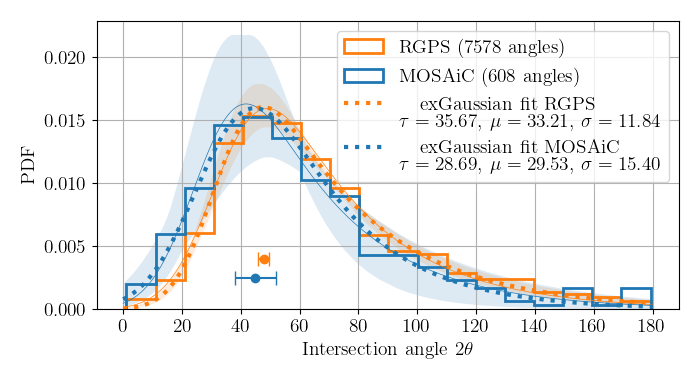

In [8]:

# Fitting the distribution with the curve_fit function

func=stats.exponnorm
#func = stats.lognorm

do_monte_carlo_test = False
do_discrete_angles = True
mc_iters = 1000

print('')
print(func)

fig, ax = plt.subplots(1, 1, figsize=(7,3.8),dpi=100)

ticks=np.arange(0,200,20)

# Using the possible angles
binsf = uni_ang[:-1] + 0.5*np.diff(uni_ang)

nbin=18
(pdf_mosa, pdf_rgps), bins, _ = ax.hist([ang_conj_mosa,ang_conj_rgps], bins = nbin, density=True, label=['MOSAiC ('+str(len(ang_conj_mosa))+' angles)','RGPS ('+str(len(ang_conj_rgps))+' angles)'], histtype='step', lw=2)

ax.set_xticks(ticks)

# another fitting method with error
#nbinsA = 180
#binsf=np.linspace(0,180, nbinsA+1)
de_r, bins_r = np.histogram(ang_conj_rgps, bins = binsf, density=True)
de_m, bins_m = np.histogram(ang_conj_mosa, bins = binsf, density=True)
centers = (0.5*(binsf[1:]+binsf[:-1]))
pars_r, cov_r = curve_fit(func.pdf, centers, de_r, p0=[ar, br, cr], method='lm')
pars_m, cov_m = curve_fit(func.pdf, centers, de_m, p0=[am, bm, cm], method='lm')

print('pars_r', pars_r)
print('pars_m', pars_m)

er = np.sqrt(np.diag(cov_r))
em = np.sqrt(np.diag(cov_m))

print('er',er)
print('em',em)

#ax.plot(th, pdf_exG(th, tr, br, cr), '-C2', lw=6)

ax.plot(th, func.pdf(th, ar, br, cr ),'-C1',lw=0.5)
ax.plot(th, func.pdf(th, am, bm, cm ),'-C0',lw=0.5)

ar = pars_r[0]
br = pars_r[1]
cr = pars_r[2]
tr = ar*cr
am = pars_m[0]
bm = pars_m[1]
cm = pars_m[2]
tm = am*cm

p_rgps = func.pdf(th, pars_r[0],  pars_r[1], pars_r[2])
p_mosa = func.pdf(th, pars_m[0],  pars_m[1], pars_m[2])

pars_r_m = pars_r + er
pars_m_m = pars_m + em

pars_r_p = pars_r - er
pars_m_p = pars_m - em

mod=[-1,0,1]

def build_errors_range_pdf(pars, e, th):
    pdf_mi = func.pdf(th, pars[0],  pars[1], pars[2])
    pdf_ma = func.pdf(th, pars[0],  pars[1], pars[2])
    def f(x):
        return -func.pdf(x, pars[0],  pars[1], pars[2])
    m = minimize(f,30).x
    mp = m
    mm = m
    for i in mod:
        for j in mod:
            for k in mod:
                par_i = pars+[i,j,k]*e
                pdf_i = func.pdf(th, par_i[0],  par_i[1], par_i[2])
                def f(x):
                    return -func.pdf(x, par_i[0],  par_i[1], par_i[2])
                m_i = minimize(f,30).x
                mp = np.fmax(mp,m_i)
                mm = np.fmin(mm,m_i)
                pdf_mi = np.fmin(pdf_mi,pdf_i)
                pdf_ma = np.fmax(pdf_ma,pdf_i) 
    return pdf_mi, pdf_ma, m, mp, mm
                
pdf_mi_r, pdf_ma_r, mr_f, mrp, mrm = build_errors_range_pdf(pars_r, er, uni_ang)
pdf_mi_m, pdf_ma_m, mm_f, mmp, mmm = build_errors_range_pdf(pars_m, em, uni_ang)

print('Mode RGPS  : m = %.02f + %.02f - %.02f' %(mr_f, mrp-mr_f,-mrm+mr_f))
print('Mode MOSAiC: m = %.02f + %.02f - %.02f' %(mm_f, mmp-mm_f,-mmm+mm_f))

# Monte-Carlo test (Clauset et al., 2009)
if do_monte_carlo_test:
    for ivals in [[ang_conj_rgps,ar,br,cr,tr],[ang_conj_mosa,am,bm,cm,tm]]:
        ang_conj,a,b,c,t = ivals
        ks_mc = []

        ks_org = stats.kstest(ang_conj,lambda x: func.cdf(x,a,b,c)).statistic

        for i in range(mc_iters):
            if do_discrete_angles:
                bins_discrete   = uni_ang[:-1] + 0.5*np.diff(uni_ang)
                sample     = func.rvs(a,b,c,size=ang_conj.size)
                # Bin to discrete values
                hist_s,bins_s = np.histogram(sample,bins=bins_discrete)
                sample_dis = np.hstack([np.ones(hist_s[i])*uni_ang[i] for i in range(hist_s.size)])
                
                ks_mc.append(stats.kstest(sample_dis,lambda x: func.cdf(x,a,b,c)).statistic)
                
            else:
                ks_mc.append(stats.kstest(func.rvs(a,b,c,size=ang_conj.size),
                                          lambda x: func.cdf(x,a,b,c)).statistic)
            
        print('ks of data: %.05f; 95 percentile of Monte Carlo: %.05f; test passed: %r' %(ks_org, np.percentile(ks_mc,95), ks_org<np.percentile(ks_mc,95)))


addr = r'exGaussian fit RGPS \\ $\tau={:.2f}$, $\mu={:.2f}$, $\sigma={:.2f}$'.format(tr,br,cr)
addm = r'exGaussian fit MOSAiC \\ $\tau={:.2f}$, $\mu={:.2f}$, $\sigma={:.2f}$'.format(tm,bm,cm)

ax.plot(th, p_rgps,':', c='C1', lw=3, label=addr)
# ax.plot(th, p_rgps_m,'-', c='C1', lw=1)
# ax.plot(th, p_rgps_p,'--', c='C1', lw=1)
# ax.fill_between(th, p_rgps_m, p_rgps_p, facecolor='C1', alpha=0.15)
ax.fill_between(uni_ang, pdf_mi_r, pdf_ma_r, facecolor='C1', alpha=0.15)
#ax.vlines([mrp,mrm], ymin=0,ymax=0.025, color='C1', lw=1)
#ax.vlines(mr_f, ymin=0,ymax=0.025, color='C1', lw=3)
ax.errorbar(mr_f, 0.004, fmt='o', xerr = [mr_f-mrm,mrp-mr_f], color='C1', capsize=5)

ax.plot(th, p_mosa,':', c='C0', lw=3, label=addm)
# ax.plot(th, p_mosa_m,'-', c='C0', lw=1)
# ax.plot(th, p_mosa_p,'--', c='C0', lw=1)
# ax.fill_between(th, p_mosa_m, p_mosa_p, facecolor='C0', alpha=0.15)
ax.fill_between(uni_ang, pdf_mi_m, pdf_ma_m, facecolor='C0', alpha=0.15)
#ax.vlines([mmp,mmm], ymin=0,ymax=0.025, color='C0', lw=1)
#ax.vlines(mm_f, ymin=0,ymax=0.025, color='C0', lw=3)
ax.errorbar(mm_f, 0.0025, fmt='o', xerr = [mm_f-mmm,mmp-mm_f], color='C0', capsize=5)

ax.legend()
ax.grid()
#ax.set_ylim([0,0.018])
ax.set_ylabel(r'PDF')
ax.set_xlabel(r'Intersection angle $2\theta$')

fname='./statistics_PDF_angles_cf.pdf'

fig.tight_layout()
fig.savefig(fname, dpi=600, edgecolor="white", facecolor="white",)
    
plt.show()


In [9]:
#Checking the function

from scipy.special import erfc

# checking the mathematical expression
def pdf_exG(x, tau, loc, scale):
    A = 1. / (2.*tau)
    B = A*np.exp(A*(2*loc+scale**2/tau-2*x))
    C = (loc+scale**2/tau-x)/(np.sqrt(2)*scale)
    return B*erfc(C)

A = pdf_exG(th, tr, br, cr)
B = stats.exponnorm.pdf(th, ar, br, cr)
dist =  np.sqrt(np.sum((A-B)**2))
print('the distributions are identical: ', dist<1e-16, '  L2 Distance is ', dist)

the distributions are identical:  True   L2 Distance is  6.58601800631132e-17


0.24013157894736842
0.2776458168382159


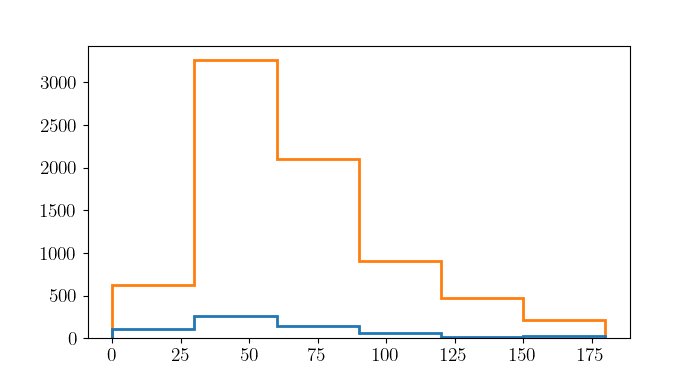

In [10]:
# Looking at percentages of intersection angles
fig, ax = plt.subplots(1, 1, figsize=(7,3.8),dpi=100)
binsp=[0,30,60,90,120,150,180]
(pdf_mosa, pdf_rgps), binspe, _ = ax.hist([ang_conj_mosa,ang_conj_rgps], density=False, bins = binsp, label=['MOSAiC ('+str(len(ang_conj_mosa))+' angles)','RGPS ('+str(len(ang_conj_rgps))+' angles)'], histtype='step', lw=2)

print(pdf_mosa[2]/len(ang_conj_mosa))
print(pdf_rgps[2]/len(ang_conj_rgps))


In [11]:
# Calculating the characteristics

def propMC(m):
    phi = 90. - m
    mu = np.tan(phi*np.pi/180.)
    muI = np.cos(phi*np.pi/180.)
    return phi, mu, muI

def propMCerr(m,mp,mm):
    phi, mu, muI = propMC(m)
    phip, mup, muIp = propMC(mp)
    phim, mum, muIm = propMC(mm)
    
    phiep = phip - phi
    phiem = phim - phi
    
    muep = mup - mu
    muem = mum - mu

    muIep = muIp - muI
    muIem = muIm - muI
    
    return phi, phiep, phiem, mu, muep, muem, muI, muIep, muIem

phi_r, phiep_r, phiem_r, mu_r, muep_r, muem_r, muI_r, muIep_r, muIem_r = propMCerr(mr_f,mrp,mrm)
phi_m, phiep_m, phiem_m, mu_m, muep_m, muem_m, muI_m, muIep_m, muIem_m = propMCerr(mm_f,mmp,mmm)

def outMC(phi, phiep, phiem, mu, muep, muem, muI, muIep, muIem):
    print('Phi = %.4f %.4f %.4f '%(phi, phiep, phiem))
    print('mu = %.4f %.4f %.4f '%(mu, muep, muem))
    print('muI = %.4f %.4f %.4f '%(muI, muIep, muIem))
    return None

print('RGPS')
outMC(phi_r, phiep_r, phiem_r, mu_r, muep_r, muem_r, muI_r, muIep_r, muIem_r)
print('')
print('MOSAiC')
outMC(phi_m, phiep_m, phiem_m, mu_m, muep_m, muem_m, muI_m, muIep_m, muIem_m)
print('')

RGPS
Phi = 42.2604 -1.7684 1.8401 
mu = 0.9087 -0.0548 0.0604 
muI = 0.7401 0.0204 -0.0220 

MOSAiC
Phi = 45.2732 -7.0769 6.8701 
mu = 1.0096 -0.2228 0.2770 
muI = 0.7037 0.0822 -0.0900 



### Test of different distributions


ar  0.37420211947397386
am  0.4397601684035453
br  -20.384791159275252
bm  -14.661391590768059
cr  81.09475265943314
cm  67.5116242632793
tr 30.34582832337756
tm 29.688923255216583
stdr 33.71989100883545
stdm 34.34974811390012
kstest dist KstestResult(statistic=0.136, pvalue=1.767765488097077e-08)
kstest data KstestResult(statistic=0.11823873817560529, pvalue=2.5848766022167606e-07)
mr [50.45058931]
mm [41.36427298]

ar  4.718501949624067
am  5.958287128113338
br  26.527941433836673
bm  18.53422843120415
cr  52.26760451485623
cm  53.48357047862291
tr 246.6247938055288
tm 318.6704695483214
stdr 32.672267566436545
stdm 33.00509653078712
kstest dist KstestResult(statistic=0.104, pvalue=3.9587400002181794e-05)
kstest data KstestResult(statistic=0.11823873817560529, pvalue=2.5848766022167606e-07)
mr [46.79201689]
mm [36.6555227]

ar  2.3960077853108572
am  2.5142674576943795
br  34.05427733796222
bm  27.17969224539012
cr  13.582202211749784
cm  12.935309308153608
tr 32.54306224101883
tm 32

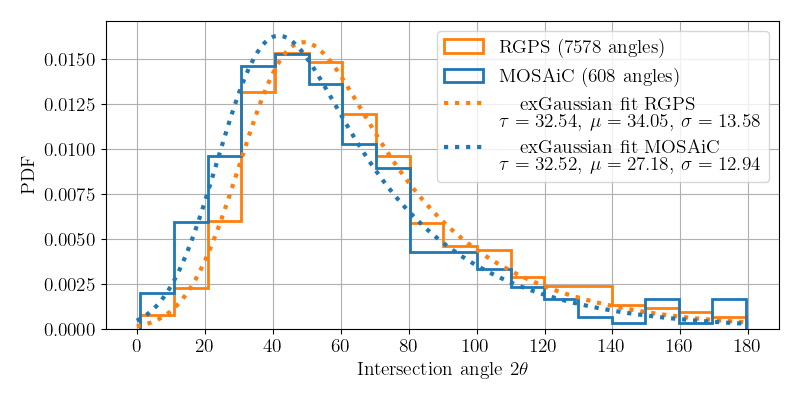

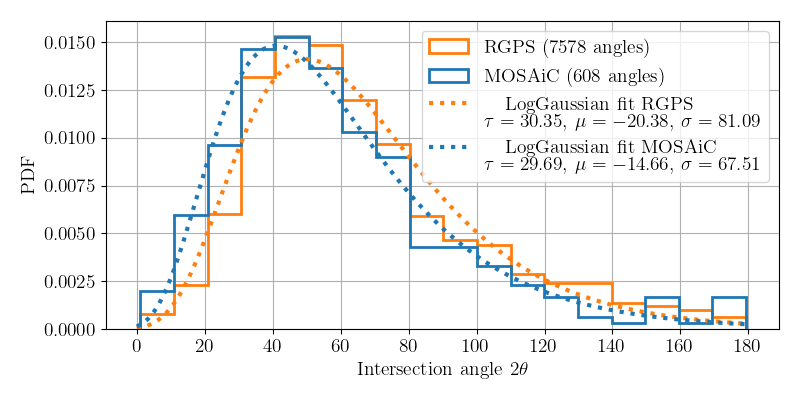

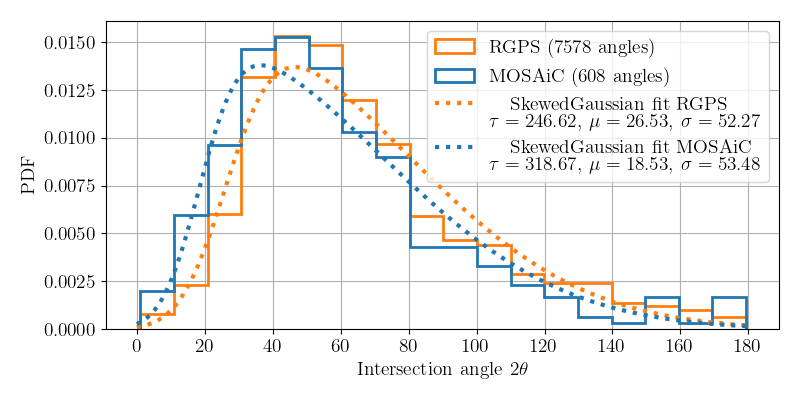

In [12]:

funcs=[stats.lognorm,stats.skewnorm,stats.exponnorm]
Names=['LogGaussian','SkewedGaussian','exGaussian']

do_monte_carlo_test = False
mc_iters = 1000

n=0
for func in funcs:
    name=Names[n]
    n+=1

    print('')
    print(func)
    
#     fig, aax = plt.subplots(2, 1, sharex=True, figsize=(8,6),dpi=100, gridspec_kw={'height_ratios': [2, 1]})
    fig, ax = plt.subplots(1, 1, figsize=(8,4),dpi=100)

    ticks=np.arange(0,200,20)

#     ax = axes[0]
    nbin=18
    data=[ang_conj_mosa,ang_conj_rgps]
    labels=['MOSAiC ('+str(len(ang_conj_mosa))+' angles)','RGPS ('+str(len(ang_conj_rgps))+' angles)']
    (pdf_mosaf, pdf_rgps), binsf, _ = ax.hist(data, bins = nbin, density=True, label=labels, histtype='step', lw=2)

    ax.set_xticks(ticks)
    
    ar, br, cr  = func.fit(ang_conj_rgps ,loc=30)
    am, bm, cm  = func.fit(ang_conj_mosa ,loc=30)

    # K
    print("ar ", ar)
    print("am ", am)

    # loc
    print("br ", br)
    print("bm ", bm)

    # scale
    print("cr ", cr)
    print("cm ", cm)

    #tau
    tr = ar*cr
    tm = am*cm
    print("tr",tr)
    print("tm",tm)

    th = np.linspace(0, 180, 1000)
    # th = np.linspace(0, 180, 10)
    p_rgps = func.pdf(th, ar, br, cr )
    p_mosa = func.pdf(th, am, bm, cm )

    print('stdr',func.std(ar, br, cr ))
    print('stdm',func.std(am, bm, cm ))

    
    N = 1000
    rr = func.rvs(ar, br, cr, size=N )
    rm = func.rvs(am, bm, cm, size=N )
    print('kstest dist', stats.kstest(rr, rm) )
    print('kstest data', stats.kstest(ang_conj_mosa, ang_conj_rgps) )
    
    def densr(x):
        return -func.pdf(x, ar, br, cr )

    def densm(x):
        return -func.pdf(x, am, bm, cm )

    mr=minimize(densr,30).x
    mm=minimize(densm,30).x

    print('mr',minimize(densr,0).x)
    print('mm',minimize(densm,0).x)
    
    # Monte-Carlo test (Clauset et al., 2009)
    if do_monte_carlo_test:
        for ivals in [[ang_conj_rgps,ar,br,cr,tr],[ang_conj_mosa,am,bm,cm,tm]]:
            ang_conj,a,b,c,t = ivals
            ks_mc = []

            ks_org = stats.kstest(ang_conj,lambda x: func.cdf(x,a,b,c)).statistic

            for i in range(mc_iters):
                ks_mc.append(stats.kstest(func.rvs(a,b,c,size=ang_conj.size),
                                          lambda x: func.cdf(x,a,b,c)).statistic)

            print('ks of data: %.05f; 95 percentile of Monte Carlo: %.05f; test passed: %r' %(ks_org, np.percentile(ks_mc,95), ks_org<np.percentile(ks_mc,95)))


    addr = r'{:s} fit RGPS \\ $\tau={:.2f}$, $\mu={:.2f}$, $\sigma={:.2f}$'.format(name,tr,br,cr)
    addm = r'{:s} fit MOSAiC \\ $\tau={:.2f}$, $\mu={:.2f}$, $\sigma={:.2f}$'.format(name,tm,bm,cm)

    ax.plot(th, p_rgps,':', c='C1', lw=3, label=addr)
    ax.plot(th, p_mosa,':', c='C0', lw=3, label=addm)

    ax.legend()
    ax.grid()
    ax.set_ylabel(r'PDF')

    ax.set_xlabel(r'Intersection angle $2\theta$')

    fname='./statistics_PDF_angles'+str(name)+'.pdf'
    
    fig.tight_layout()
    fig.savefig(fname, dpi=600, edgecolor="white", facecolor="white",)
    
plt.show()

## Analysis of seasonal PDFs

### Extract and ploting the pdfs

7578
608
7578
608


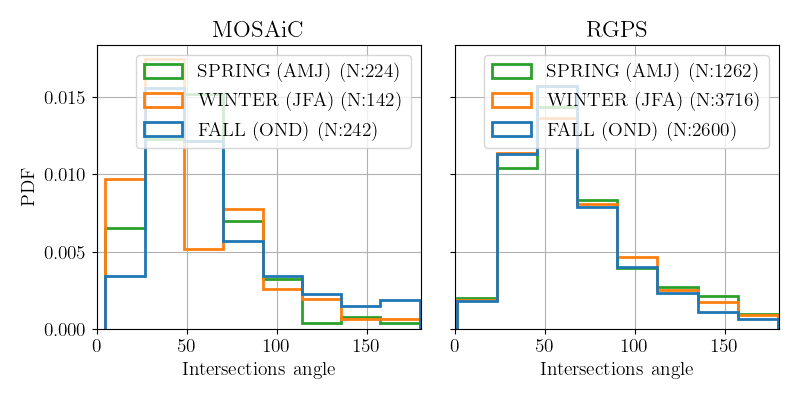

In [13]:
dates_rgps_c = data_rgps['dates'][np.all([data_rgps['type']==0,np.all(data_rgps['lifetimes']==1,axis=1)],axis=0)]
dates_mosa_c = data_mosa['dates'][np.all([data_mosa['type']==0,np.all(data_mosa['lifetimes']==1,axis=1)],axis=0)]

print(len(dates_rgps_c))
print(len(dates_mosa_c))

# print(dates_rgps_c[400:420])
# print(dates_rgps_c[1].split('-'))
# print(dates_rgps_c[1].split('-')[1])

fall = [10,11,12]
winter = [1,2,3]
spring = [4,5,6]

cond_fall= [int(i.split('-')[1]) in fall for i in dates_rgps_c]
ang_conj_rgps_fall = ang_conj_rgps[cond_fall]


cond_winter= [int(i.split('-')[1]) in winter for i in dates_rgps_c]
ang_conj_rgps_winter = ang_conj_rgps[cond_winter]


cond_spring= [int(i.split('-')[1]) in spring for i in dates_rgps_c]
ang_conj_rgps_spring = ang_conj_rgps[cond_spring]

print(len(ang_conj_rgps_spring)+len(ang_conj_rgps_winter)+len(ang_conj_rgps_fall))

cond_fall= [int(str(i).split('-')[1]) in fall for i in dates_mosa_c]
ang_conj_mosa_fall = ang_conj_mosa[cond_fall]


cond_winter= [int(str(i).split('-')[1]) in winter for i in dates_mosa_c]
ang_conj_mosa_winter = ang_conj_mosa[cond_winter]

cond_spring= [int(str(i).split('-')[1]) in spring for i in dates_mosa_c]
ang_conj_mosa_spring = ang_conj_mosa[cond_spring]

print(len(ang_conj_mosa_spring)+len(ang_conj_mosa_winter)+len(ang_conj_mosa_fall))

nbins=8

fig, axes = plt.subplots(1, 2, figsize=(8,4),dpi=100, sharey=True)

mosa = [ang_conj_mosa_fall, ang_conj_mosa_winter, ang_conj_mosa_spring]
mosa_lab = ['FALL (OND)\\ (N:'+str(len(ang_conj_mosa_fall))+')','WINTER (JFA)\\ (N:'+str(len(ang_conj_mosa_winter))+')','SPRING (AMJ)\\ (N:'+str(len(ang_conj_mosa_spring))+')']
(pdf_mosa_F, pdf_mosa_W, pdf_mosa_S), binsS, _ = axes[0].hist(mosa, label=mosa_lab, bins=nbins, density=True, histtype='step', lw=2)
axes[0].set_title('MOSAiC')
axes[0].legend()
axes[0].set_ylabel('PDF')
axes[0].set_xlabel('Intersections angle')
axes[0].grid()
axes[0].set_xlim([0,180])


rgps = [ang_conj_rgps_fall, ang_conj_rgps_winter, ang_conj_rgps_spring]
rgps_lab = ['FALL (OND)\\ (N:'+str(len(ang_conj_rgps_fall))+')','WINTER (JFA)\\ (N:'+str(len(ang_conj_rgps_winter))+')','SPRING (AMJ)\\ (N:'+str(len(ang_conj_rgps_spring))+')']
(pdf_rgps_F, pdf_rgps_W, pdf_rgps_S), binsS, _ = axes[1].hist(rgps, label=rgps_lab, bins=nbins, density=True, histtype='step', lw=2)
axes[1].set_title('RGPS')
axes[1].legend()
axes[1].set_xlabel('Intersections angle')
axes[1].grid()
axes[1].set_xlim([0,180])

fig.tight_layout()

### Analysis of MOSAiC seasonnal variations

mosa
kstest data mosa fall winter KstestResult(statistic=0.24502386218135258, pvalue=3.222033273544916e-05)
kstest data mosa fall spring KstestResult(statistic=0.1123819362455726, pvalue=0.09565787068066635)
kstest data mosa spring winter KstestResult(statistic=0.21617203219315895, pvalue=0.0004736976445089579)

rgps
kstest data rgps fall winter KstestResult(statistic=0.0500471971516105, pvalue=0.000898502819565533)
kstest data rgps fall spring KstestResult(statistic=0.05881019139339266, pvalue=0.005321620571325371)
kstest data rgps spring winter KstestResult(statistic=0.028187526761389903, pvalue=0.4329160869933061)



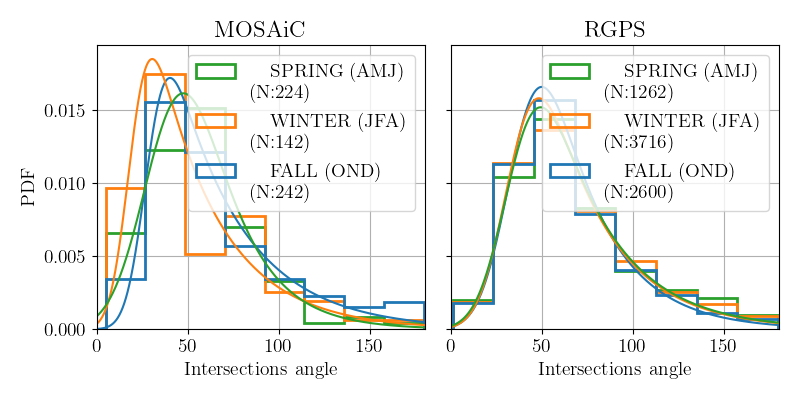

In [14]:
print('mosa')
print('kstest data mosa fall winter', stats.kstest(ang_conj_mosa_fall, ang_conj_mosa_winter) ) 
print('kstest data mosa fall spring', stats.kstest(ang_conj_mosa_fall, ang_conj_mosa_spring) ) 
print('kstest data mosa spring winter', stats.kstest(ang_conj_mosa_spring, ang_conj_mosa_winter) ) 
print('')
print('rgps')
print('kstest data rgps fall winter', stats.kstest(ang_conj_rgps_fall, ang_conj_rgps_winter) ) 
print('kstest data rgps fall spring', stats.kstest(ang_conj_rgps_fall, ang_conj_rgps_spring) ) 
print('kstest data rgps spring winter', stats.kstest(ang_conj_rgps_spring, ang_conj_rgps_winter) ) 



func=stats.exponnorm

print('')
print(func)

arf, brf, crf  = func.fit(ang_conj_rgps_fall )
arw, brw, crw  = func.fit(ang_conj_rgps_winter )
ars, brs, crs  = func.fit(ang_conj_rgps_spring )

amf, bmf, cmf  = func.fit(ang_conj_mosa_fall )
amw, bmw, cmw  = func.fit(ang_conj_mosa_winter )
ams, bms, cms  = func.fit(ang_conj_mosa_spring )

nbin=1000
th2 = np.linspace(0, 180, nbin)
p_rgps_f = func.pdf(th2, arf, brf, crf )
p_rgps_w = func.pdf(th2, arw, brw, crw )
p_rgps_s = func.pdf(th2, ars, brs, crs )

p_mosa_f = func.pdf(th2, amf, bmf, cmf )
p_mosa_w = func.pdf(th2, amw, bmw, cmw )
p_mosa_s = func.pdf(th2, ams, bms, cms )

nbins=8

fig, axes = plt.subplots(1, 2, figsize=(8,4),dpi=100, sharey=True)

mosa = [ang_conj_mosa_fall, ang_conj_mosa_winter, ang_conj_mosa_spring]
mosa_lab = [r'FALL (OND)\\ (N:'+str(len(ang_conj_mosa_fall))+')',r'WINTER (JFA)\\ (N:'+str(len(ang_conj_mosa_winter))+')',r'SPRING (AMJ)\\ (N:'+str(len(ang_conj_mosa_spring))+')']
(pdf_mosa_F, pdf_mosa_W, pdf_mosa_S), binsS, _ = axes[0].hist(mosa, label=mosa_lab, bins=nbins, density=True, histtype='step', lw=2)
axes[0].plot(th2,p_mosa_f, c='C0')
axes[0].plot(th2,p_mosa_w, c='C1')
axes[0].plot(th2,p_mosa_s, c='C2')
axes[0].set_title('MOSAiC')
axes[0].legend()
axes[0].set_ylabel('PDF')
axes[0].set_xlabel('Intersections angle')
axes[0].grid()
axes[0].set_xlim([0,180])


rgps = [ang_conj_rgps_fall, ang_conj_rgps_winter, ang_conj_rgps_spring]
rgps_lab = [r'FALL (OND)\\ (N:'+str(len(ang_conj_rgps_fall))+')',r'WINTER (JFA)\\ (N:'+str(len(ang_conj_rgps_winter))+')',r'SPRING (AMJ)\\ (N:'+str(len(ang_conj_rgps_spring))+')']
(pdf_rgps_F, pdf_rgps_W, pdf_rgps_S), binsS, _ = axes[1].hist(rgps, label=rgps_lab, bins=nbins, density=True, histtype='step', lw=2)
axes[1].plot(th2,p_rgps_f, c='C0')
axes[1].plot(th2,p_rgps_w, c='C1')
axes[1].plot(th2,p_rgps_s, c='C2')
axes[1].set_title('RGPS')
axes[1].legend()
axes[1].set_xlabel('Intersections angle')
axes[1].grid()
axes[1].set_xlim([0,180])

fig.tight_layout()

## Link to the yield curve

### Extract the yield curve from the PDF

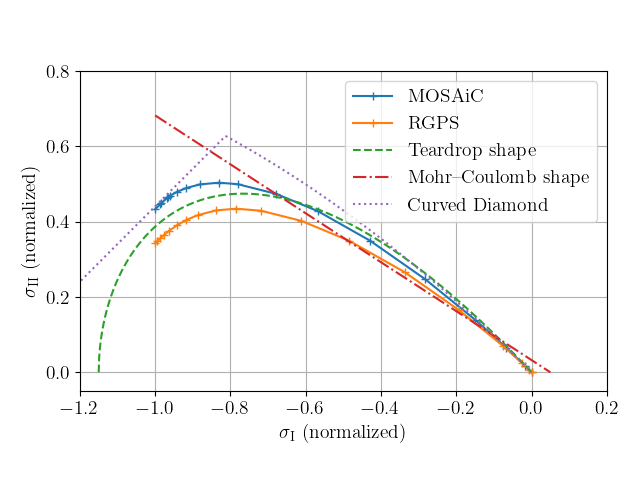

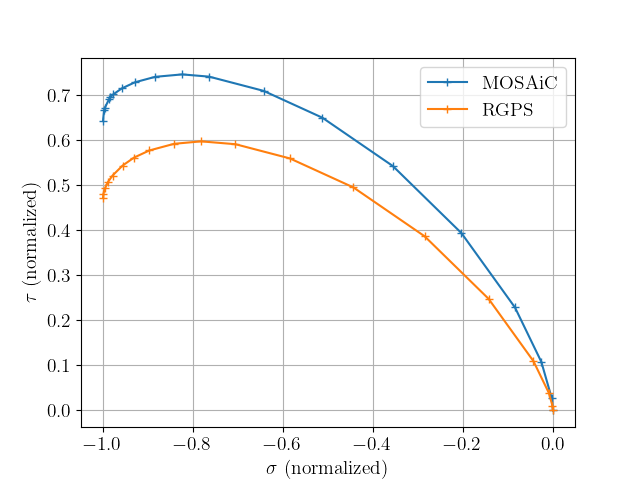

In [15]:

nbin=18
(pdf_mosa, pdf_rgps), bins, _ = ax.hist([ang_conj_mosa,ang_conj_rgps], bins = nbin, density=True, label=['MOSAiC ('+str(len(ang_conj_mosa))+' angles)','RGPS ('+str(len(ang_conj_rgps))+' angles)'], histtype='step', lw=2)

th = 0.5*(bins[1:]+bins[:-1])
pdf_m = pdf_mosa
pdf_r = pdf_rgps

#if plot:
#    plt.figure(dpi=200)
#    plt.plot(th, pdf_m)
#    plt.plot(th, pdf_r)

mu=np.tan(np.pi/2-th*np.pi/180.)
# print('mu : ', mu)

yc_x_m=np.zeros(mu.shape[0]+1)
yc_y_m=np.zeros(mu.shape[0]+1)
yc_x_r=np.zeros(mu.shape[0]+1)
yc_y_r=np.zeros(mu.shape[0]+1)
# print('yc : ', yc_x)

for i in range(1,yc_x_m.shape[0]):
    # print("i : ",i)
    yc_x_m[i]= -np.cos(np.arctan(mu[i-1]))*pdf_m[i-1]+yc_x_m[i-1]
    yc_y_m[i]= np.sin(np.arctan(mu[i-1]))*pdf_m[i-1]+yc_y_m[i-1]

    yc_x_r[i]= -np.cos(np.arctan(mu[i-1]))*pdf_r[i-1]+yc_x_r[i-1]
    yc_y_r[i]= np.sin(np.arctan(mu[i-1]))*pdf_r[i-1]+yc_y_r[i-1]

s_r = -deepcopy(yc_x_r[-1])
s_m = -deepcopy(yc_x_m[-1])

yc_x_r=yc_x_r/s_r
yc_x_m=yc_x_m/s_m

yc_y_r=yc_y_r/s_r
yc_y_m=yc_y_m/s_m

if plot:
    plt.figure(dpi=100)
    plt.plot(yc_x_m, yc_y_m, '-+', label='MOSAiC')
    plt.plot(yc_x_r, yc_y_r, '-+', label='RGPS')
    plt.axis('scaled')
    plt.grid()
    plt.xlabel(r"$\sigma$ (normalized)")
    plt.ylabel(r"$\tau$ (normalized)")
    plt.legend()

mu=np.cos(th*np.pi/180.)
# print('mu : ', mu)

yc_x_m=np.zeros(mu.shape[0]+1)
yc_y_m=np.zeros(mu.shape[0]+1)
yc_x_r=np.zeros(mu.shape[0]+1)
yc_y_r=np.zeros(mu.shape[0]+1)
# print('yc : ', yc_x)

for i in range(1,yc_x_m.shape[0]):
    # print("i : ",i)
    yc_x_m[i]= -np.cos(np.arctan(mu[i-1]))*pdf_m[i-1]+yc_x_m[i-1]
    yc_y_m[i]= np.sin(np.arctan(mu[i-1]))*pdf_m[i-1]+yc_y_m[i-1]

    yc_x_r[i]= -np.cos(np.arctan(mu[i-1]))*pdf_r[i-1]+yc_x_r[i-1]
    yc_y_r[i]= np.sin(np.arctan(mu[i-1]))*pdf_r[i-1]+yc_y_r[i-1]

s_r = -deepcopy(yc_x_r[-1])
s_m = -deepcopy(yc_x_m[-1])

yc_x_r=yc_x_r/s_r
yc_x_m=yc_x_m/s_m

yc_y_r=yc_y_r/s_r
yc_y_m=yc_y_m/s_m

if plot:
    plt.figure(dpi=100)
    plt.plot(yc_x_m, yc_y_m, '-+', label='MOSAiC')
    plt.plot(yc_x_r, yc_y_r, '-+', label='RGPS')
    
    p=-1.15
    kt=0.0
    sI=np.linspace(p,kt,1000)
    sII=-(sI-kt)*np.sqrt(sI-p)
    plt.plot(sI, sII, ls='dashed' , label='Teardrop shape')
    
    p=-1
    kt=0.05
    sI=np.linspace(p,kt,1000)
    mu=0.65
    sII=-mu*sI+kt*mu
    plt.plot(sI, sII, ls='dashdot' , label='Mohr--Coulomb shape')
    
    p=1.5
    ps=-0.542*p
    alpha_p=0.42
    kt=0.00
    sIa=np.linspace(ps,0,475)
    sIb=np.linspace(-p,ps,475)
    sIc=np.linspace(0,kt,50)
    mu=1
    sIIa=mu*(p*kt-sIa)*(1+alpha_p*sIa/p)
    sIIb=mu*(p*kt-ps)*(1+alpha_p*ps/p)+(sIb-ps)
    sIIc=mu*(p*kt)-sIc
    plt.plot(sIa, sIIa, ls='dotted', color='C4', label='Curved Diamond')  
    plt.plot(sIb, sIIb, ls='dotted', color='C4')  
    plt.plot(sIc, sIIc, ls='dotted', color='C4')  
    
    plt.axis('scaled')
    plt.grid()
    plt.xlabel(r"$\sigma_{\mathrm{I}}$ (normalized)")
    plt.ylabel(r"$\sigma_{\mathrm{II}}$ (normalized)")
    plt.legend(loc=1)
    plt.xlim([-1.2,0.2])
    plt.ylim([-0.05,0.8])

    plt.tight_layout()
    plt.savefig('YC_approx.pdf',dpi=600, bbox_inches='tight')

plt.show()

### Extract the PDF from the ellipse

/var/folders/jk/nc7lpbb10jldxr36nlplkpz80000gn/T/ipykernel_11281/1389238256.py:24: RuntimeWarning: invalid value encountered in arccos
  angles=np.arccos(slope)*180/np.pi


M_2k_e2_ca N= 758
M_2k_e1_ca N= 672
M_2k_e07_ca N= 662
MG_e2_ca N= 72
MG_e1_ca N= 48
MG_2e1_ca N= 52
MG_e07_ca N= 76
I_e1_ca N= 54
I_e2_ca N= 54
e2 N= 758
e1 N= 672
e07 N= 662


/var/folders/jk/nc7lpbb10jldxr36nlplkpz80000gn/T/ipykernel_11281/1389238256.py:153: RuntimeWarning: invalid value encountered in arccos
  angles=np.arccos(slope)*180/np.pi


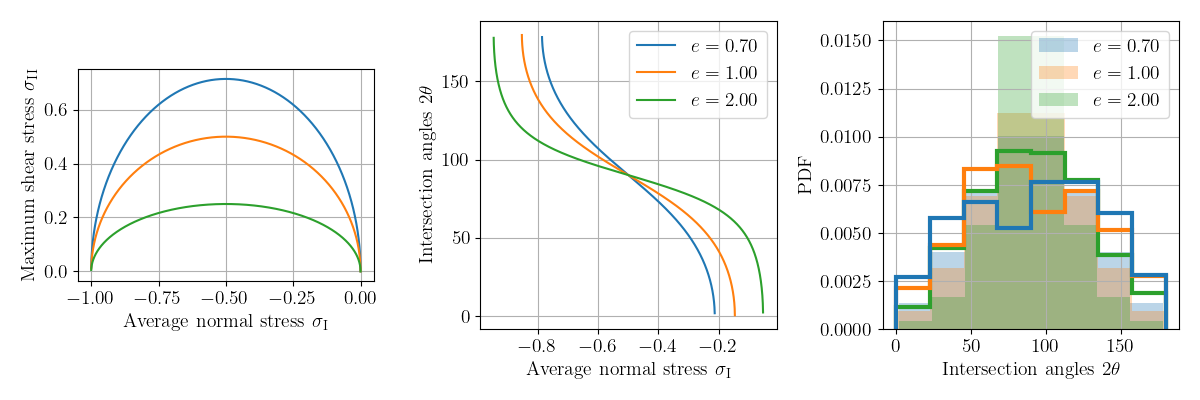

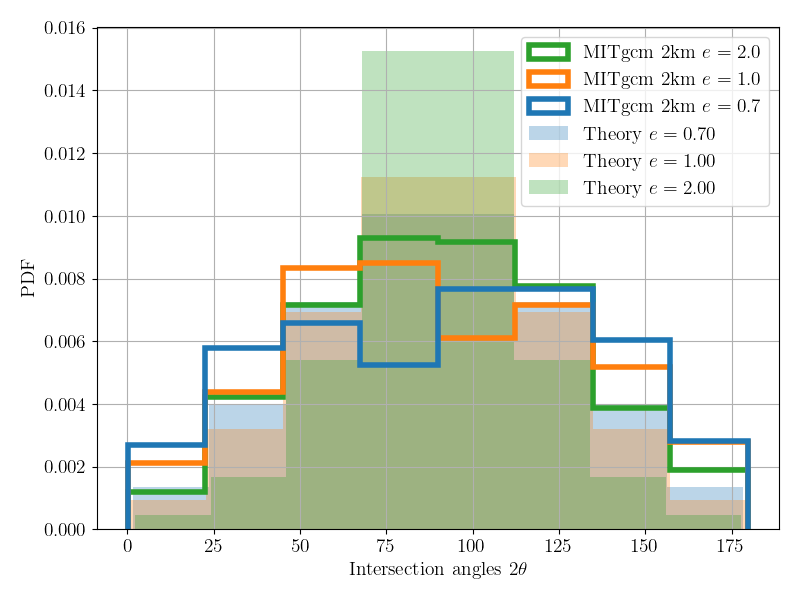

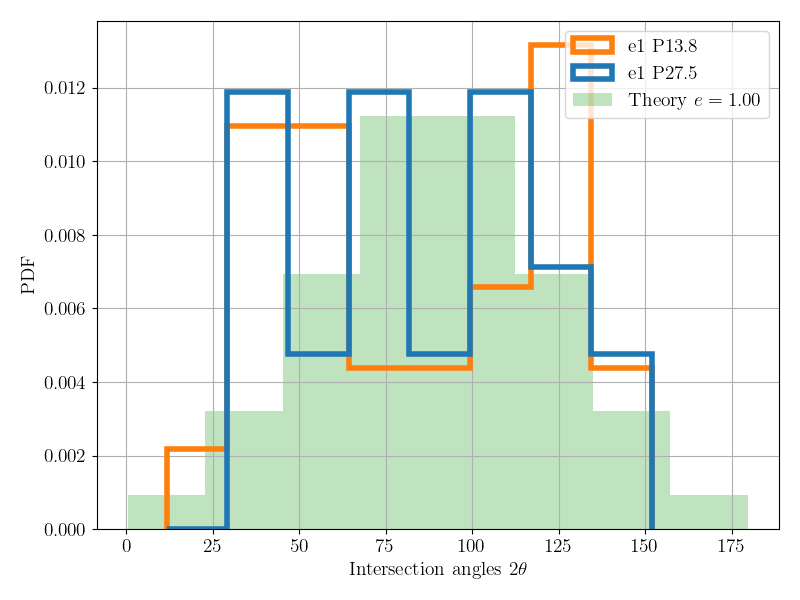

In [16]:
# parameter
nbin = 8

# elliptical function
def ell(sI,e):
    return 1/e*np.sqrt(-sI**2-sI)

colors= ['C0', 'C1', 'C2']

def plot_angles(e,axes):

    dsI=1e-4
    sI=np.arange(0,-1,-dsI)
    #print("sI",sI)
    sIm=0.5*(sI[1:]+sI[:-1])

    sII=ell(sI,e)
    #print("sII",sII)

    slope=(sII[1:]-sII[:-1])/dsI
    #print("slope",slope)
    #print("slope length", len(slope))

    angles=np.arccos(slope)*180/np.pi
    #print("angles",angles)

    axes[0].plot(sI, sII,label="$e={:.2f}$".format(e))
    axes[0].axis('scaled')
    axes[1].plot(sIm, angles,label="$e={:.2f}$".format(e))
    axes[2].hist(angles, bins=nbin,label="$e={:.2f}$".format(e), density=True, alpha=0.3)
    
    return None

fig, axes = plt.subplots(1, 3, figsize=(12,4),dpi=100)

plot_angles(0.7,axes)
plot_angles(1,axes)
plot_angles(2,axes)

for ax in range(len(axes)):
    axes[ax].grid()

axes[2].legend()
axes[1].legend()

# Data from models
typ = 0


# MITgcm
M_2k_e2_ang = np.load('model_intersection_angles/MITgcm_2km_e2_P22_64/intersec_analysis_180deg_deg.npy', mmap_mode='r')
M_2k_e2_typ = np.load('model_intersection_angles/MITgcm_2km_e2_P22_64/intersec_analysis_180deg_type.npy', mmap_mode='r')
M_2k_e2_ca = M_2k_e2_ang[M_2k_e2_typ==typ]
print('M_2k_e2_ca N=',len(M_2k_e2_ca))

M_2k_e1_ang = np.load('model_intersection_angles/MITgcm_2km_e1_P9_6/intersec_analysis_180deg_deg.npy', mmap_mode='r')
M_2k_e1_typ = np.load('model_intersection_angles/MITgcm_2km_e1_P9_6/intersec_analysis_180deg_type.npy', mmap_mode='r')
M_2k_e1_ca = M_2k_e1_ang[M_2k_e1_typ==typ]
print('M_2k_e1_ca N=',len(M_2k_e1_ca))
    
M_2k_e07_ang = np.load('model_intersection_angles/MITgcm_2km_e07_P9_6/intersec_analysis_180deg_deg.npy', mmap_mode='r')
M_2k_e07_typ = np.load('model_intersection_angles/MITgcm_2km_e07_P9_6/intersec_analysis_180deg_type.npy', mmap_mode='r')
M_2k_e07_ca = M_2k_e07_ang[M_2k_e07_typ==typ]
print('M_2k_e07_ca N=',len(M_2k_e07_ca))


# McGill
MG_e2_ang = np.load('model_intersection_angles/McGill_e2_P27_5/intersec_analysis_180deg_deg.npy', mmap_mode='r')
MG_e2_typ = np.load('model_intersection_angles/McGill_e2_P27_5/intersec_analysis_180deg_type.npy', mmap_mode='r')
MG_e2_ca = MG_e2_ang[MG_e2_typ==typ]
print('MG_e2_ca N=',len(MG_e2_ca))

MG_e1_ang = np.load('model_intersection_angles/McGill_e1_P27_5/intersec_analysis_180deg_deg.npy', mmap_mode='r')
MG_e1_typ = np.load('model_intersection_angles/McGill_e1_P27_5/intersec_analysis_180deg_type.npy', mmap_mode='r')
MG_e1_ca = MG_e1_ang[MG_e1_typ==typ]
print('MG_e1_ca N=',len(MG_e1_ca))

MG_2e1_ang = np.load('model_intersection_angles/McGill_e1_P13_8/intersec_analysis_180deg_deg.npy', mmap_mode='r')
MG_2e1_typ = np.load('model_intersection_angles/McGill_e1_P13_8/intersec_analysis_180deg_type.npy', mmap_mode='r')
MG_2e1_ca = MG_2e1_ang[MG_2e1_typ==typ]
print('MG_2e1_ca N=',len(MG_2e1_ca))

MG_e07_ang = np.load('model_intersection_angles/McGill_e07_P9_6/intersec_analysis_180deg_deg.npy', mmap_mode='r')
MG_e07_typ = np.load('model_intersection_angles/McGill_e07_P9_6/intersec_analysis_180deg_type.npy', mmap_mode='r')
MG_e07_ca = MG_e07_ang[MG_e07_typ==typ]
print('MG_e07_ca N=',len(MG_e07_ca))

# IFREMER
I_e1_ang = np.load('model_intersection_angles/IFREMER_e1_P13_8/intersec_analysis_180deg_deg.npy')
I_e1_typ = np.load('model_intersection_angles/IFREMER_e1_P13_8/intersec_analysis_180deg_type.npy')
I_e1_ca = I_e1_ang[I_e1_typ==typ]
print('I_e1_ca N=',len(I_e1_ca))

I_e2_ang = np.load('model_intersection_angles/IFREMER_e2_P20/intersec_analysis_180deg_deg.npy')
I_e2_typ = np.load('model_intersection_angles/IFREMER_e2_P20/intersec_analysis_180deg_type.npy')
I_e2_ca = I_e2_ang[I_e2_typ==typ]
print('I_e2_ca N=',len(I_e2_ca))


e2_ang_ca = np.append(MG_e2_ca, np.append(I_e2_ca, M_2k_e2_ca))
e1_ang_ca = np.append(MG_2e1_ca,np.append(I_e1_ca, np.append(M_2k_e1_ca,MG_e1_ca)))
e07_ang_ca = np.append(MG_e07_ca,M_2k_e07_ca)



#data_model = [e07_ang_ca, e1_ang_ca, e2_ang_ca]
data_model = [M_2k_e07_ca, M_2k_e1_ca, M_2k_e2_ca]
#data_lab = ['Models $e=0.7$', 'Models $e=1.0$', 'Models $e=2.0$']
data_lab = ['MITgcm 2km $e=0.7$', 'MITgcm 2km $e=1.0$', 'MITgcm 2km $e=2.0$']
colors= ['C0', 'C1', 'C2']

print('e2 N=',len(data_model[2]))
print('e1 N=',len(data_model[1]))
print('e07 N=',len(data_model[0]))

ax=axes[0]
ax.set_ylabel(r'Maximum shear stress $\sigma_{\mathrm{II}}$')
ax.set_xlabel(r'Average normal stress $\sigma_{\mathrm{I}}$')
#ax.set_title('Yield curve')


ax=axes[1]
ax.set_ylabel(r'Intersection angles $2\theta$')
ax.set_xlabel(r'Average normal stress $\sigma_{\mathrm{I}}$')
#ax.set_title('Intersection angles as function of $\sigma_{\mathrm{I}}$')

ax=axes[2]
ax.set_ylabel(r'PDF')
ax.set_xlabel(r'Intersection angles $2\theta$')
#ax.set_title('PDF of the intersection angles')

ax.hist(data_model, bins=nbin,label=data_lab, histtype='step', density=True, color=colors, lw=3)



fig.tight_layout()
fig.savefig('./IA_ellipse.pdf', dpi=300, edgecolor="white", facecolor="white",)

def plot_pdf(e,ax):

    dsI=1e-4
    sI=np.arange(0,-1,-dsI)
    #print("sI",sI)
    sIm=0.5*(sI[1:]+sI[:-1])

    sII=ell(sI,e)
    #print("sII",sII)

    slope=(sII[1:]-sII[:-1])/dsI
    #print("slope",slope)
    #print("slope length", len(slope))

    angles=np.arccos(slope)*180/np.pi
    #print("angles",angles)

    ax.hist(angles, bins=8,label="Theory $e={:.2f}$".format(e), density=True, lw=2, alpha=0.3)
    
    return None

fig, ax = plt.subplots(1, 1, figsize=(8,6),dpi=100)

ax.hist(data_model, bins=nbin,label=data_lab, histtype='step', density=True, color=colors, lw=4)

plot_pdf(0.7,ax)
plot_pdf(1,ax)
plot_pdf(2,ax)

ax.grid()
ax.legend()

ax.set_ylabel(r'PDF')
ax.set_xlabel(r'Intersection angles $2\theta$')
#ax.set_title('PDF of the intersection angles')

fig.tight_layout()
fig.savefig('./PDF_ellipse.pdf', dpi=300, edgecolor="white", facecolor="white",)

fig, ax = plt.subplots(1, 1, figsize=(8,6),dpi=100)

datae1 = [MG_e1_ca,MG_2e1_ca]
lable1 = ['e1 P27.5', 'e1 P13.8']


ax.hist(datae1, bins=nbin,label=lable1, histtype='step', density=True, lw=4)

plot_pdf(1,ax)


ax.grid()
ax.legend()

ax.set_ylabel(r'PDF')
ax.set_xlabel(r'Intersection angles $2\theta$')
#ax.set_title('PDF of the intersection angles')

fig.tight_layout()
fig.savefig('./PDF_ellipse.pdf', dpi=300, edgecolor="white", facecolor="white",)

/var/folders/jk/nc7lpbb10jldxr36nlplkpz80000gn/T/ipykernel_11281/3130739414.py:23: RuntimeWarning: invalid value encountered in arccos
  angles=np.arccos(slope)*180/np.pi


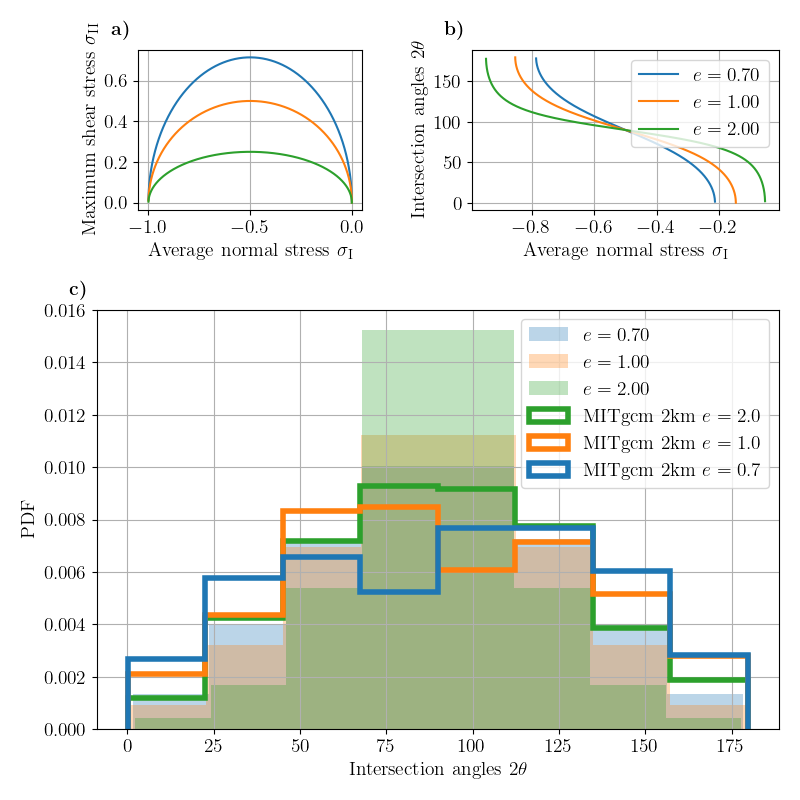

In [17]:
mosaic = [['a)', 'b)'],
          ['c)', 'c)'],
          ['c)', 'c)']]

nbin = 8

fig, axes = plt.subplot_mosaic(mosaic, figsize=(8,8),dpi=100)

def plot_angles(e,axes):

    dsI=1e-4
    sI=np.arange(0,-1,-dsI)
    #print("sI",sI)
    sIm=0.5*(sI[1:]+sI[:-1])

    sII=ell(sI,e)
    #print("sII",sII)

    slope=(sII[1:]-sII[:-1])/dsI
    #print("slope",slope)
    #print("slope length", len(slope))

    angles=np.arccos(slope)*180/np.pi
    #print("angles",angles)

    axes['a)'].plot(sI, sII,label="$e={:.2f}$".format(e))
    axes['a)'].axis('scaled')
    axes['b)'].plot(sIm, angles,label="$e={:.2f}$".format(e))
    axes['c)'].hist(angles, bins=nbin,label="$e={:.2f}$".format(e), density=True, alpha=0.3)
    
    return None

plot_angles(0.7,axes)
plot_angles(1,axes)
plot_angles(2,axes)

ax=axes['a)']
ax.set_ylabel(r'Maximum shear stress $\sigma_{\mathrm{II}}$')
ax.set_xlabel(r'Average normal stress $\sigma_{\mathrm{I}}$')
#ax.set_title('Yield curve')
ax.grid()


ax=axes['b)']
ax.set_ylabel(r'Intersection angles $2\theta$')
ax.set_xlabel(r'Average normal stress $\sigma_{\mathrm{I}}$')
#ax.set_title('Intersection angles as function of $\sigma_{\mathrm{I}}$')
ax.grid()
ax.legend()


ax=axes['c)']
ax.set_ylabel(r'PDF')
ax.set_xlabel(r'Intersection angles $2\theta$')
#ax.set_title('PDF of the intersection angles')
ax.grid()
n_models = ax.hist(data_model, bins=nbin,label=data_lab, histtype='step', density=True, color=colors, lw=4)
ax.legend()

for label, ax in axes.items():
    # label physical distance to the left and up:
    trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
    ax.text(0.0, 1.0, r'\textbf{'+label+'}', transform=ax.transAxes + trans,
            fontsize='medium', va='bottom', fontfamily='serif')


fig.tight_layout()
fig.savefig('./PDF_ellipse_models.pdf', dpi=300, edgecolor="white", facecolor="white",)

### Link back to yield curve

/var/folders/jk/nc7lpbb10jldxr36nlplkpz80000gn/T/ipykernel_11281/3001831725.py:29: RuntimeWarning: invalid value encountered in arccos
  angles=np.arccos(slope)*180/np.pi


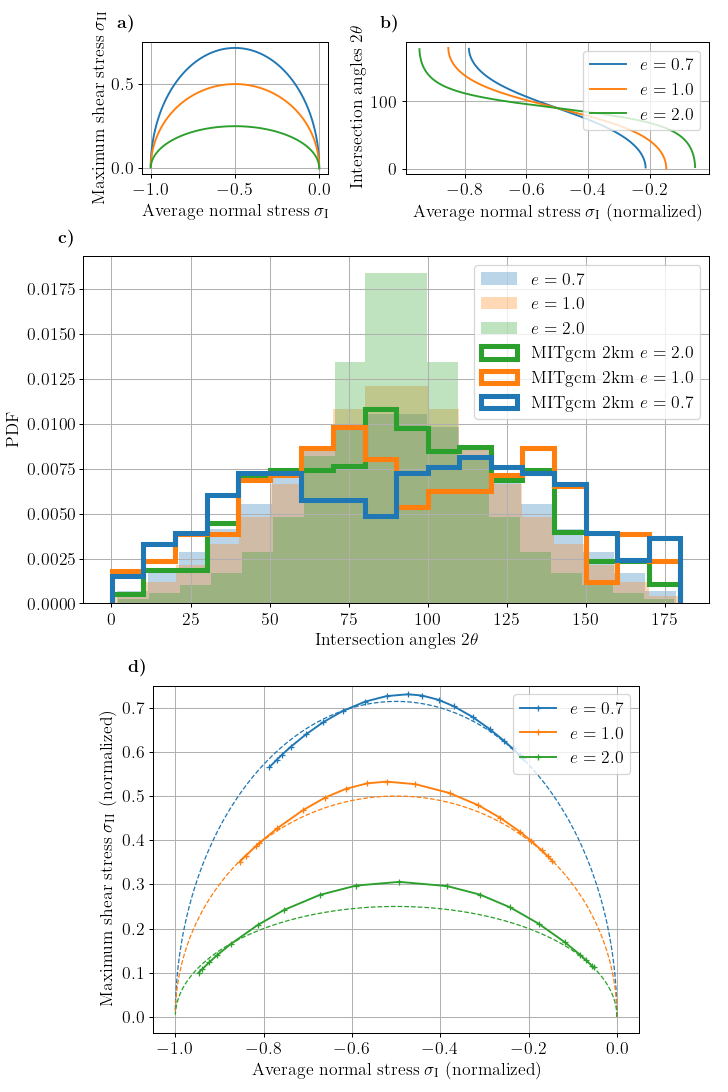

In [22]:
mosaic = [['a)', 'b)'],
          ['c)', 'c)'],
          ['c)', 'c)'],
          ['d)', 'd)'],
          ['d)', 'd)']]

# mosaic = [['a)', 'b)', 'd)', 'd)'],
#           ['c)', 'c)', 'd)', 'd)'],
#           ['c)', 'c)', 'd)', 'd)']]

nbin=18

fig, axes = plt.subplot_mosaic(mosaic, figsize=(8,12),dpi=91)

def plot_angles(e,axes):

    dsI=1e-4
    sI=np.arange(0,-1,-dsI)
    #print("sI",sI)
    sIm=0.5*(sI[1:]+sI[:-1])

    sII=ell(sI,e)
    #print("sII",sII)

    slope=(sII[1:]-sII[:-1])/dsI
    #print("slope",slope)
    #print("slope length", len(slope))

    angles=np.arccos(slope)*180/np.pi
    #print("angles",angles)

    axes['a)'].plot(sI, sII,label="$e={:.1f}$".format(e))
    axes['d)'].plot(sI, sII, lw=1, ls='dashed')
    axes['a)'].axis('scaled')
    axes['d)'].axis('scaled')
    axes['b)'].plot(sIm, angles,label="$e={:.1f}$".format(e))
    axes['c)'].hist(angles, bins=nbin,label="$e={:.1f}$".format(e), density=True, alpha=0.3)
    
    return None

plot_angles(0.7,axes)
plot_angles(1,axes)
plot_angles(2,axes)

ax=axes['a)']
ax.set_ylabel(r'Maximum shear stress $\sigma_{\mathrm{II}}$')
ax.set_xlabel(r'Average normal stress $\sigma_{\mathrm{I}}$')
#ax.set_title('Yield curve')
ax.grid()


ax=axes['b)']
ax.set_ylabel(r'Intersection angles $2\theta$')
ax.set_xlabel(r'Average normal stress $\sigma_\mathrm{I}$ (normalized)')
#ax.set_title('Intersection angles as function of $\sigma_{\mathrm{I}}$')
ax.grid()
ax.legend()


ax=axes['c)']
ax.set_ylabel(r'PDF')
ax.set_xlabel(r'Intersection angles $2\theta$')
#ax.set_title('PDF of the intersection angles')
ax.grid()
((n07,n1,n2),bins,other) = ax.hist(data_model, bins=nbin,label=data_lab, histtype='step', density=True, color=colors, lw=4)
ax.legend()

for label, ax in axes.items():
    # label physical distance to the left and up:
    trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
    ax.text(0.0, 1.0, r'\textbf{'+label+'}', transform=ax.transAxes + trans,
            fontsize='medium', va='bottom', fontfamily='serif')


fig.tight_layout()
fig.savefig('./PDF_ellipse_models_2.pdf', dpi=300, edgecolor="white", facecolor="white",)

###########

th = 0.5*(bins[1:]+bins[:-1])

def sIxp(e):
    return 0.5*(np.sqrt(e**2/(e**2+1))-1)

def sIxm(e):
    return 0.5*(-np.sqrt(e**2/(e**2+1))-1)

def sIIxp(e):
    sIx_p=sIxp(e)
    return ell(sIx_p,e)

def sIIxm(e):
    sIx_m=sIxm(e)
    return ell(sIx_m,e)

def plot_yc_sIsII(th, pdf, label, ax=None, e=2.0, color=None):
        
    mu=np.cos(th*np.pi/180.)
    # print('mu : ', mu)

    yc_x=np.zeros(mu.shape[0]+1)
    yc_y=np.zeros(mu.shape[0]+1)
    # print('yc : ', yc_x)
    
    # print(yc_x.shape[0])
    for i in range(1,yc_x.shape[0]):
        # print("i : ",i)
        yc_x[i]= -np.cos(np.arctan(mu[i-1]))*pdf[i-1]+yc_x[i-1]
        yc_y[i]= np.sin(np.arctan(mu[i-1]))*pdf[i-1]+yc_y[i-1]

    s = -deepcopy(yc_x[-1])
    
    yc_x=yc_x/s
    yc_y=yc_y/s
    
    sIx_p=sIxp(e)
    sIIx_p=sIIxp(e)
    
    sIx_m=sIxm(e)
    sIIx_m=sIIxm(e)
    
    yc_x=yc_x*(sIx_p-sIx_m)+sIx_p
    yc_y=yc_y*(sIx_p-sIx_m)+sIIx_p

    if ax == None:
        plt.figure(dpi=100)
        ax=plt.gca()

    if color==None:
        ax.plot(yc_x, yc_y, '-+', ms=5, label=label)
    else:
        ax.plot(yc_x, yc_y, '-+', ms=5, label=label, color=color)
        
    ax.grid()
    ax.legend(loc=1)

    plt.tight_layout()
        # plt.savefig('YC_approx_'+label+'.pdf',dpi=600, bbox_inches='tight')

def plot_yc_ts(th, pdf, label, ax=None, color=None):
    
    mu=np.tan(np.pi/2-th*np.pi/180.)
    # print('mu : ', mu)

    yc_x=np.zeros(mu.shape[0]+1)
    yc_y=np.zeros(mu.shape[0]+1)
    # print('yc : ', yc_x)
    
    # print(yc_x.shape[0])
    for i in range(1,yc_x.shape[0]):
        # print("i : ",i)
        yc_x[i]= -np.cos(np.arctan(mu[i-1]))*pdf[i-1]+yc_x[i-1]
        yc_y[i]= np.sin(np.arctan(mu[i-1]))*pdf[i-1]+yc_y[i-1]

    s = -deepcopy(yc_x[-1])
    
    yc_x=yc_x/s
    yc_y=yc_y/s

    if ax == None :
        plt.figure(dpi=100)
        ax=plt.gca()
    if color==None:
        ax.plot(yc_x, yc_y, '-+', label=label)
    else:
        ax.plot(yc_x, yc_y, '-+', label=label, color=color)
    ax.grid()
    ax.legend()
    ax.axis('scaled')

    plt.tight_layout()
    # plt.savefig('YC_approx_'+label+'.pdf',dpi=600, bbox_inches='tight')
        
# plot_yc_ts(th,n07,'$e=0.7$',ax=axes['d)'])
# plot_yc_ts(th,n1,'$e=1.0$',ax=axes['d)'])
# plot_yc_ts(th,n2,'$e=2.0$',ax=axes['d)'])

plt.xlabel('Average normal stress $\sigma_\mathrm{I}$ (normalized)')
plt.ylabel('Maximum shear stress $\sigma_\mathrm{II}$ (normalized)')

plot_yc_sIsII(th,n07,'$e=0.7$',ax=axes['d)'], color='C0', e=0.7)
plot_yc_sIsII(th,n1,'$e=1.0$',ax=axes['d)'], color='C1', e=1.0)
plot_yc_sIsII(th,n2,'$e=2.0$',ax=axes['d)'], color='C2', e=2.0)

plt.savefig('YC_approx_andback.pdf',dpi=600, bbox_inches='tight')

plt.show()
